# <div align="center"><ins>Project on Predictive Data Modeling with Portugal 2019 Election Data</ins></div>

<div align="center"><img src="docs/images/election-img.jpg" width = 100%/></div>

***
**NORKA B5, Group 3**<br>
**Team Members:** *Sruthy Surendran, Heleena Joy, Jebitta Joseph, Gopikrishna Shyam Kumar, Sreehari P S*
***

### <div align="center"> About the Dataset </div>
***

Dataset used in this project describes the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019. The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 21 parties involved in the electoral event. Overall, the dataset contains 21643 records over 28 features (including the target variable). This dataset is a combination of data concerning the overall election and the party voting information which are joined w.r.t the timestamp of data acquisition and the respective district.<br><br>
**Election data columns** = *{'TimeElapsed', 'time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes', 'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage', 'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage', 'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters'}*<br>
**Party data columns** = *{'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes'}*
<br>**Column Description:**

|Sno|Column|Type|Description|
|:-|:-|:-|:-|
|1|TimeElapsed |numeric|Time (minutes) passed since the first data acquisition|
|2|time|timestamp|Date and time of the data acquisition|
|3|territoryName|string|Short name of the location (district or nation-wide)|
|4|totalMandates|numeric|MP's elected at the moment|
|5|availableMandates|numeric|MP's left to elect at the moment|
|6|numParishes|numeric|Total number of parishes in this location|
|7|numParishesApproved|numeric|Number of parishes approved in this location|
|8|blankVotes|numeric|Number of blank votes (NOTA)|
|9|blankVotesPercentage|numeric|Percentage of blank votes|
|10|nullVotes|numeric|Number of null votes (Incorrect Info)|
|11|nullVotesPercentage|numeric|Percentage of null votes|
|12|votersPercentage|numeric|Percentage of voters|
|13|subscribedVoters|numeric| Number of subscribed voters in the location|
|14|totalVoters|numeric|Number of votes cast|
|15|pre.blankVotes|numeric|Number of blank votes (previous election)|
|16|pre.blankVotesPercentage|numeric|Percentage of blank votes (previous election)|
|17|pre.nullVotes|numeric|Number of null votes (previous election)|
|18|pre.nullVotesPercentage|numeric|Percentage of null votes (previous election)|
|19|pre.votersPercentage|numeric|Percentage of voters (previous election)|
|20|pre.subscribedVoters|numeric|Number of subscribed voters in the location (previous election)|
|21|pre.totalVoters|numeric|Number of votes cast (previous election)|
|22|Party|string|Political Party|
|23|Mandates|numeric|MP's elected at the moment for the party in a given district|
|24|Percentage|numeric|Percentage of votes in a party|
|25|validVotesPercentage|numeric|Percentage of valid votes in a party|
|26|Votes|numeric|Party votes|
|27|Hondt|numeric|Number of MP's according to the distribution of votes now|
|28|FinalMandates|numeric (Target)|Final number of elected MP's in a territory for a Party|

*Courtesy:*
1. https://archive.ics.uci.edu/ml/datasets/Real-time+Election+Results%3A+Portugal+2019
2. https://www.analyticsvidhya.com/

### About Portugal
>1. Portugal has 20 districts, out of which 2 are autonomous.
2. There are 21 parties which participates in election across districts of portugal.
3. "Território Nacional" refers to portugal as a nation, not a serparate district as others. "Madeira and Açores" are Autonomous regions in Portugal

### Problem Statement
>To apply regression modelling to predict total number of MPs elected from a party under a given region.

***
### <div align="center"> Python Environment Setup </div>
***

In [57]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

***
### <div align="center"> Basic Analysis </div>
***

In [58]:
# Load the dataset to pandas dataframe
ucdata = pd.read_csv("./dataset/Portugal_Election_Data.csv")

In [59]:
print(f"Shape of uncleaned election dataset is {ucdata.shape}")

Shape of uncleaned election dataset is (21643, 28)


In [60]:
print(f"Columns in uncleaned election dataset are::\n {ucdata.columns.values}")

Columns in uncleaned election dataset are::
 ['TimeElapsed' 'time' 'territoryName' 'totalMandates' 'availableMandates'
 'numParishes' 'numParishesApproved' 'blankVotes' 'blankVotesPercentage'
 'nullVotes' 'nullVotesPercentage' 'votersPercentage' 'subscribedVoters'
 'totalVoters' 'pre.blankVotes' 'pre.blankVotesPercentage' 'pre.nullVotes'
 'pre.nullVotesPercentage' 'pre.votersPercentage' 'pre.subscribedVoters'
 'pre.totalVoters' 'Party' 'Mandates' 'Percentage' 'validVotesPercentage'
 'Votes' 'Hondt' 'FinalMandates']


***
### <div align="center"> Data Preprocessing</div>
***

In [61]:
colset1 = ['TimeElapsed','time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes'] # Sreehari P S
colset2 = ['numParishesApproved', 'blankVotes', 'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage', 'votersPercentage'] # Sruthy Surendran
colset3 = ['subscribedVoters','totalVoters', 'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes','pre.nullVotesPercentage'] # Heleena Joy
colset4 = ['pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters', 'Party', 'Mandates', 'Percentage'] # Gopikrishna Shyam Kumar
colset5 = ['validVotesPercentage','Votes', 'Hondt', 'FinalMandates'] # Jebitta Joseph

<div class="alert alert-success"><b>1. Handling Null values</b></div>

In [62]:
ucdata.isna().sum()

TimeElapsed                  0
time                         0
territoryName                0
totalMandates                0
availableMandates            0
numParishes                  0
numParishesApproved          0
blankVotes                   0
blankVotesPercentage        14
nullVotes                    0
nullVotesPercentage          0
votersPercentage             0
subscribedVoters             0
totalVoters                  7
pre.blankVotes               0
pre.blankVotesPercentage     0
pre.nullVotes                0
pre.nullVotesPercentage     12
pre.votersPercentage         0
pre.subscribedVoters         0
pre.totalVoters              0
Party                        0
Mandates                     0
Percentage                   0
validVotesPercentage         0
Votes                        0
Hondt                        0
FinalMandates                0
dtype: int64

#### **Findings:** There are Null values present.
|Column Name|Number of Null Values|
|:-:|:-:|
|blankVotesPercentage|14|
|totalVoters|7|
|pre.nullVotesPercentage|12|

**Ways to fill null values:**
***
1. *Imputation*
>The imputation method develops reasonable guesses for missing data. It’s most useful when the percentage of missing data is low. If the portion of missing data is too high, the results lack natural variation that could result in an effective model.
>* Mean, Median and Mode
>* Last Observation Carried Forward (LOCF)
>* Next Observation Carried Backward (NOCB)
>* Linear Interpolation
>* Seasonal Adjustment with Linear Interpolation
>* Multiple Imputation
>* K Nearest Neighbors
2. *Removing Data*
>When dealing with data that is missing at random, related data can be deleted to reduce bias. Removing data may not be the best option if there are not enough observations to result in a reliable analysis. In some situations, observation of specific events or factors may be required.

For the Portuguese Election dataset **Imputation** is the right choice. From the dataset it is clear that these missing values are indeed related to other columns.<br>
Hence missing values can be imputed with values calculated from other columns.<br>The formula for caluculations are given below.

$$
totalVoters = \frac{votersPercentage*subscribedVoters}{100}
$$
<br>
$$
pre.nullVotesPercentage = \frac{pre.nullVotes}{pre.totalVoters}*100
$$
<br>
$$
blankVotesPercentage = \frac{blankVotes}{totalVoters}*100
$$

In [63]:
cdata = ucdata

In [64]:
# Handle "totalVoters"
cdata['totalVoters'] = ucdata['totalVoters'].fillna(round((ucdata['votersPercentage']*ucdata['subscribedVoters'])/100))

In [65]:
# Handle "pre.nullVotesPercentage"
cdata['pre.nullVotesPercentage'] = ucdata['pre.nullVotesPercentage'].fillna(round(((ucdata['pre.nullVotes']/ucdata['pre.totalVoters'])*100),2))

In [66]:
# Handle "blankVotesPercentage"
cdata['blankVotesPercentage'] = ucdata['blankVotesPercentage'].fillna(round(((ucdata['blankVotes']/ucdata['totalVoters'])*100),2))

In [67]:
cdata.isna().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

**All Missing values are handled**

<div class="alert alert-success"><b>2. Handle Outliers</b></div>

In [68]:
# Columns set 1
print(colset1)

['TimeElapsed', 'time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes']


#### **Observation:**
>Both TimeElapsed and time are time-components for the dataset. They span 4hr 25mins. So no need to handle outliers for these fields

#### **Findings:**
>Above graph shows the count of data for 20 district along with whole nation ('Território Nacional'). Count of values present for each district are different.</br>There are 2 factors contributing to this difference, 1. Number of Parties and 2. Number of intervals for which data arrived.

In [69]:
def draw_boxes(columns, nrow, ncolumn, figuresize):
    fig, axes = plt.subplots(nrows = nrow, ncols = ncolumn, figsize = figuresize)
    for col, ax in zip(columns, axes.flat):
        sns.boxplot(x = col, data = cdata, ax=ax, color = 'r')
        ax.set_title('Box plot for ' + col)
    # disable leftover axes
    for ax in axes.flat[len(columns):]:
        ax.set_axis_off()
    plt.show()

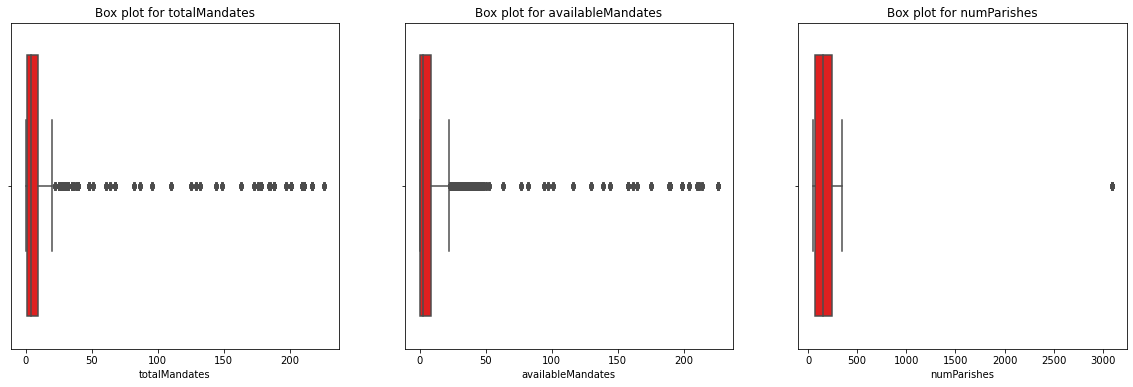

In [70]:
draw_boxes(colset1[3:6], 1, 3, (20, 6))

In [71]:
cdata[colset1[3:6]].describe().T

,count,mean,std,min,25%,50%,75%,max
totalMandates,21643.0,11.544795,31.314567,0.0,1.0,4.0,9.0,226.0
availableMandates,21643.0,11.499284,31.738783,0.0,0.0,3.0,9.0,226.0
numParishes,21643.0,309.956013,659.055911,54.0,75.0,147.0,242.0,3092.0


#### **Conclusion:**
From the graph and quatiles it can be seen that there are outliers present in the dataset. **But**, if we observe the dataset closly interesting observations can be found.

* **totalMandates** represents 'MP's elected at the moment' and **availableMandates** represents 'MP's left to elect at the moment'. These 2 columns are inverse to each other i.e. as time passes *totalMandates* decreases and *availableMandates* increases by same amount.<br>
* From the distribution it is clear that for most time-period in dataset *totalMandates* and *availableMandates* equals "zero".<br> This is a valid case as we know in election, count of elected members only increase towards end of counting.

So from the context of this dataset we can conclude that the outliers that we see in plots of *totalMandates* and *availableMandates* can be ignored.

* For the column **numParishes**, there is only 1 outlier, i.e. 3092

This is also a valid outlier as we know that our dataset contains rows that represent Portugal as a whole. This particular row will contain the sum of all others.<br> So this outlier can also be ignored.

#### Extracting feature and Target for further steps
***

In [72]:
X = cdata.drop('FinalMandates', axis = 1) # Feature Set
y = pd.DataFrame(cdata['FinalMandates']) # Target

In [73]:
print(f'Shape of feature set = {X.shape} and Shape of Target  = {y.shape}')
print(f'\nFeature columns = {X.columns.values}')

Shape of feature set = (21643, 27) and Shape of Target  = (21643, 1)

Feature columns = ['TimeElapsed' 'time' 'territoryName' 'totalMandates' 'availableMandates'
 'numParishes' 'numParishesApproved' 'blankVotes' 'blankVotesPercentage'
 'nullVotes' 'nullVotesPercentage' 'votersPercentage' 'subscribedVoters'
 'totalVoters' 'pre.blankVotes' 'pre.blankVotesPercentage' 'pre.nullVotes'
 'pre.nullVotesPercentage' 'pre.votersPercentage' 'pre.subscribedVoters'
 'pre.totalVoters' 'Party' 'Mandates' 'Percentage' 'validVotesPercentage'
 'Votes' 'Hondt']


<div class="alert alert-success"><b>3. Feature Reduction</b></div>

From Exploratory data analysis it was clear that *TimeElapsed* has no relationship with our target variable *FinalMandates*. This is because *TimeElapsed* just represents the time of data arrival, which was intern derived from the time column *time*.
* So both these columns can be dropped from our feature set.

In [74]:
X.drop(['time','TimeElapsed'],axis = 1, inplace=True)

In [82]:
X.drop(['territoryName', 'Party'], axis = 1).apply(lambda feature : feature.corr(y['FinalMandates'])).sort_values(ascending=True)

pre.nullVotesPercentage    -0.038686
nullVotesPercentage        -0.029659
blankVotesPercentage       -0.001195
pre.blankVotesPercentage    0.005716
pre.votersPercentage        0.050450
votersPercentage            0.061048
totalMandates               0.264117
availableMandates           0.266764
totalVoters                 0.294490
pre.blankVotes              0.294866
pre.totalVoters             0.295169
subscribedVoters            0.295555
blankVotes                  0.295583
pre.subscribedVoters        0.296428
pre.nullVotes               0.297482
nullVotes                   0.298663
numParishesApproved         0.312177
numParishes                 0.329009
validVotesPercentage        0.382744
Percentage                  0.383086
Mandates                    0.814370
Votes                       0.882502
Hondt                       0.994480
dtype: float64

From EDA and above analysis, it is also clear that features *'pre.nullVotesPercentage', 'nullVotesPercentage','blankVotesPercentage', 'pre.blankVotesPercentage'* also does not have relationship with target variable *FinalMandates*.
* So these columns can be droped from feature set

In [83]:
X.drop(['pre.nullVotesPercentage', 'nullVotesPercentage','blankVotesPercentage', 'pre.blankVotesPercentage'], axis = 1, inplace=True)

In [84]:
print(f'New shape of feature set is {X.shape}')

New shape of feature set is (21643, 21)


<div class="alert alert-success"><b>4. Encoding</b></div>

In [85]:
X[['territoryName','Party']].nunique()

territoryName    21
Party            21
dtype: int64

There are 21 unique values present for both **territoryName** and **Party**. So we can go ahead with *Label Encoding*

In [86]:
encoder = LabelEncoder()
X['territoryName'] = encoder.fit_transform(X['territoryName'])
X['Party'] = encoder.fit_transform(X['Party'])

In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   territoryName         21643 non-null  int32  
 1   totalMandates         21643 non-null  int64  
 2   availableMandates     21643 non-null  int64  
 3   numParishes           21643 non-null  int64  
 4   numParishesApproved   21643 non-null  int64  
 5   blankVotes            21643 non-null  int64  
 6   nullVotes             21643 non-null  int64  
 7   votersPercentage      21643 non-null  float64
 8   subscribedVoters      21643 non-null  int64  
 9   totalVoters           21643 non-null  float64
 10  pre.blankVotes        21643 non-null  int64  
 11  pre.nullVotes         21643 non-null  int64  
 12  pre.votersPercentage  21643 non-null  float64
 13  pre.subscribedVoters  21643 non-null  int64  
 14  pre.totalVoters       21643 non-null  int64  
 15  Party              

All features are now in numerical type.

<div class="alert alert-success"><b>5. Standardization</b></div>

In [88]:
# Standard Scaling
X_columns = X.columns
y_columns = y.columns
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X_columns)
y = pd.DataFrame(StandardScaler().fit_transform(y), columns=y_columns) # target scaling for LinearRegression Model

<div class="alert alert-success"><b>6. Feature Engineering</b></div>

In [123]:
cdata.to_csv(path_or_buf='./dataset/Processed_Portugal_Election_Data.csv', index=False, encoding = 'utf-8')

***
### <div align="center"> Modeling</div>
***

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [90]:
r2_dict = {}
def check_metrices(y_test, y_pred, model):
    print(f"Performance of {model} Model\n{'_'*50}\n")
    print(f'      MAE =  {mean_absolute_error(y_test, y_pred)}')
    print(f'      MSE =  {mean_squared_error(y_test, y_pred)}')
    r2 = r2_score(y_test, y_pred)
    r2_dict[model] = r2
    print(f' R2_Score =  {r2}')
    print(f'Max Error =  {max_error(y_test, y_pred)}')

#### 01. Linear Regression 

In [91]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
check_metrices(y_test, lr_pred, 'LinearRegression')

Performance of LinearRegression Model
__________________________________________________

      MAE =  0.02717600439491664
      MSE =  0.00642250720598178
 R2_Score =  0.9946014355995932
Max Error =  1.4739102268508155


#### 02. Random forest Regressor

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
check_metrices(y_test, rf_pred, 'RandomForestRegressor')

Performance of RandomForestRegressor Model
__________________________________________________

      MAE =  0.0003753665788332877
      MSE =  2.9154676167434705e-05
 R2_Score =  0.9999754934651196
Max Error =  0.14550777291690267


In [108]:
for key, value in zip(rf_model.feature_importances_, X.columns):
    print(f'{value} = {key*100}')

territoryName = 0.04246673603206289
totalMandates = 0.0037813218078910364
availableMandates = 0.006826894235265821
numParishes = 0.018882981805313708
numParishesApproved = 0.018898184308762306
blankVotes = 0.003155573894971623
nullVotes = 0.002505597319478358
votersPercentage = 0.008589882742206255
subscribedVoters = 0.0030827476149516402
totalVoters = 0.00443548608392701
pre.blankVotes = 0.0032907092978540385
pre.nullVotes = 0.003245918121836607
pre.votersPercentage = 0.007309902812841605
pre.subscribedVoters = 0.004252676072671226
pre.totalVoters = 0.0034723128932969767
Party = 1.0068751410202124
Mandates = 0.00014808316934596878
Percentage = 0.3899893427783523
validVotesPercentage = 0.4799808371884384
Votes = 0.011036671248665574
Hondt = 97.97777299955165


#### 03. XGBoost Regressor

In [93]:
from xgboost import XGBRegressor
xgb_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
check_metrices(y_test, xgb_pred, 'XGBRegressor')

Performance of XGBRegressor Model
__________________________________________________

      MAE =  0.0003753665788332877
      MSE =  2.9154676167434705e-05
 R2_Score =  0.9999754934651196
Max Error =  0.14550777291690267


In [94]:
best_model = max(r2_dict, key = lambda key: r2_dict[key])

In [95]:
print(f'Best model is {best_model} with R2_Score of {r2_dict.get(best_model)}')

Best model is RandomForestRegressor with R2_Score of 0.9999754934651196


**target leakage or overfitting**